<a href="https://colab.research.google.com/github/jihun0423/Object-detection/blob/main/yolov3_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ultralytics Yolo v3 설치

In [ ]:
!git clone https://github.com/ultralytics/yolov3
!cd yolov3;pip install -qr requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 10843, done.
remote: Counting objects: 100% (765/765), done.
remote: Compressing objects: 100% (404/404), done.
remote: Total 10843 (delta 501), reused 573 (delta 360), pack-reused 10078
Receiving objects: 100% (10843/10843), 9.87 MiB | 21.97 MiB/s, done.
Resolving deltas: 100% (7300/7300), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.0/613.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00


In [ ]:
!cat yolov3/requirements.txt

# YOLOv3 requirements
# Usage: pip install -r requirements.txt

# Base ------------------------------------------------------------------------
gitpython>=3.1.30
matplotlib>=3.3
numpy>=1.22.2
opencv-python>=4.1.1
Pillow>=7.1.2
psutil  # system resources
PyYAML>=5.3.1
requests>=2.23.0
scipy>=1.4.1
thop>=0.1.1  # FLOPs computation
torch>=1.7.0  # see https://pytorch.org/get-started/locally (recommended)
torchvision>=0.8.1
tqdm>=4.64.0
ultralytics>=8.0.147
# protobuf<=3.20.1  # https://github.com/ultralytics/yolov5/issues/8012

# Logging ---------------------------------------------------------------------
# tensorboard>=2.4.1
# clearml>=1.2.0
# comet

# Plotting --------------------------------------------------------------------
pandas>=1.1.4
seaborn>=0.11.0

# Export ----------------------------------------------------------------------
# coremltools>=6.0  # CoreML export
# onnx>=1.10.0  # ONNX export
# onnx-simplifier>=0.4.1  # ONNX simplifier
# nvidia-pyindex  # TensorRT export
# nvi

In [ ]:
from IPython.display import Image, clear_output  # to display images
import torch

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.1+cu118 (Tesla V100-SXM2-16GB)


In [ ]:
!nvidia-smi

Mon Aug 14 07:13:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    23W / 300W |      2MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!cd yolov3/data/images;ls -lia

/bin/bash: line 1: cd: yolov3/data/images: No such file or directory
total 39525
83 -rw------- 1 root root  8114418 Jul 22 06:44  bryant.mp4
84 -rw------- 1 root root  5586886 Aug  9 07:16  bryant_yoloV3.avi
75 drwx------ 2 root root     4096 Jun 23 06:59  colab_tf115_modify_files
74 drwx------ 2 root root     4096 Jun 23 06:59  data
73 drwx------ 2 root root     4096 Jun 23 06:59  Detection
78 -rw------- 1 root root  6567662 Jun 23 06:58  DLCV_Colab_SrcCode_20200905.zip
77 -rw------- 1 root root   141521 Jun 23 06:58  GCP_GPU_Driver_Install.pptx
79 -rw------- 1 root root 11210614 Jun 23 06:58  incredibles.zip
80 -rw------- 1 root root  2063693 Jun 23 06:58  labelimg.pptx
72 drwx------ 2 root root     4096 Jun 23 06:59  mask_rcnn_tf2_test
70 drwx------ 2 root root     4096 Jul 24 03:44  mmdetection
76 -rw------- 1 root root      142 Jun 23 06:58  README.md
71 drwx------ 2 root root     4096 Jun 23 06:59  Segmentation
82 -rw------- 1 root root  4149275 Jul 22 06:35  steele.mp4
81 -rw---

### 이미지 Detection
* https://github.com/ultralytics/yolov3/blob/master/tutorial.ipynb
* detect.py를 python으로 직접 호출하여 수행 가능
* python detect.py --source 0 # webcam
                            file.jpg #image
                            file.mp4 #video
                            path/ #directory path 밑에 있는 jpg 를 모두 변환
                            path/*.jpg #path 디렉토리 밑에 있는 jpg를 모두 변환
                            'https://youtu.be/NUsoVlDfqZq # Youtube video. CV UI가 필요함. Jupyter notebook 지원 안됨.

In [ ]:
## --project를 설정하지 않으면 자동으로 runs/detect/exp로 detect된 결과가 저장됨.(2번째 수행하면 exp2 디렉토리가 생성됨.
## coco로 pretrained된 yolov3.pt weight가 없으면 자동으로 download함.
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images

detect: weights=['yolov3.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv3 🚀 v9.6.0-105-g44cb63f Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

100% 119M/119M [00:02<00:00, 54.2MB/s]

Fusing layers... 
yolov3 summary: 261 layers, 61922845 parameters, 0 gradients
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bicycle, 1 bus, 37.0ms
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 40.1ms
Speed: 0.6ms pre-process, 38.6ms inference, 139.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [ ]:
# 결과가 runs/detect/exp에 저장됨
!ls -lia ./yolov3/runs/detect/exp

total 744
2360286 drwxr-xr-x 2 root root   4096 Aug 14 07:13 .
2360285 drwxr-xr-x 3 root root   4096 Aug 14 07:13 ..
2360296 -rw-r--r-- 1 root root 494823 Aug 14 07:13 bus.jpg
2360297 -rw-r--r-- 1 root root 254735 Aug 14 07:13 zidane.jpg


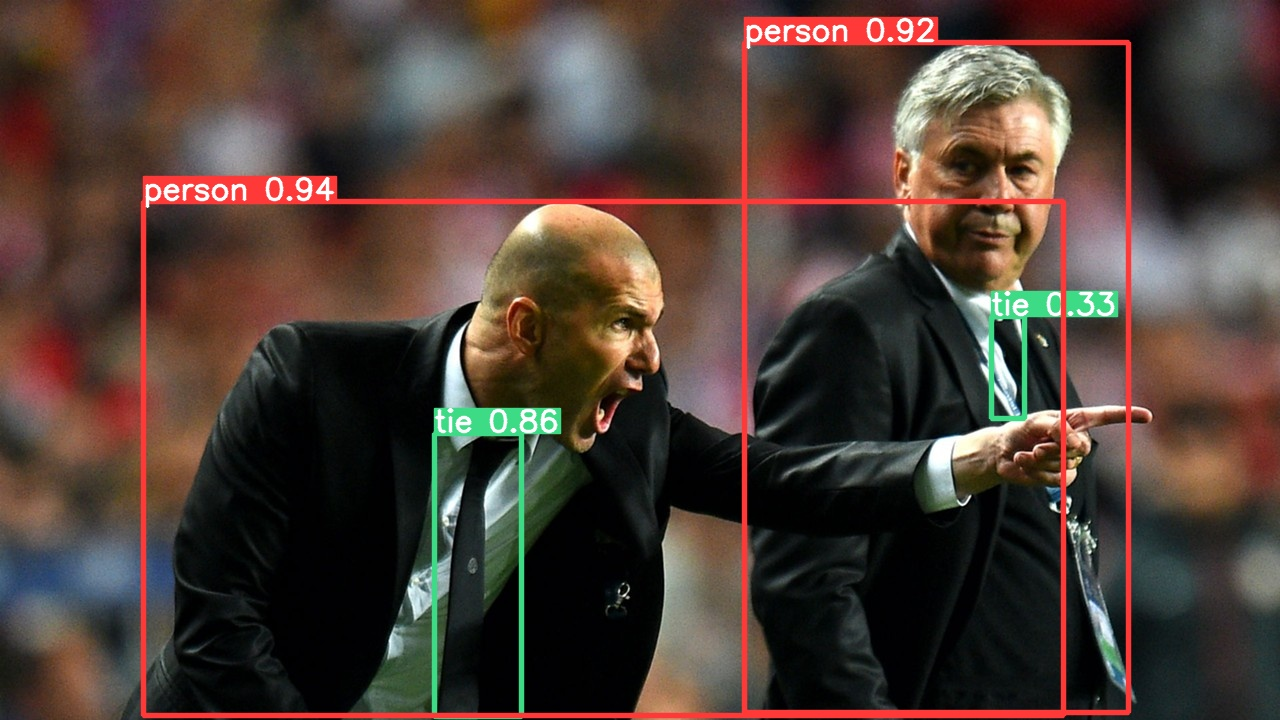

In [ ]:
  from IPython.display import Image, clear_output

Image(filename='yolov3/runs/detect/exp/zidane.jpg', width=600)

### 다른 image로 Detect 수행

In [ ]:
!mkdir /content/data
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2023-08-14 07:14:51--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.01s   

2023-08-14 07:14:52 (30.3 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]



In [ ]:
# 실행 디렉토리를 고정하고, 시각화시 bounding box line 두께를 조절.
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/data/beatles01.jpg  \
                            --project /content/data  --name=run_image --exist-ok --line-thickness 1

detect: weights=['yolov3.pt'], source=/content/data/beatles01.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data, name=run_image, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv3 🚀 v9.6.0-105-g44cb63f Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
yolov3 summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /content/data/beatles01.jpg: 512x640 5 persons, 11 cars, 1 truck, 1 handbag, 36.6ms
Speed: 0.6ms pre-process, 36.6ms inference, 83.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/run_image


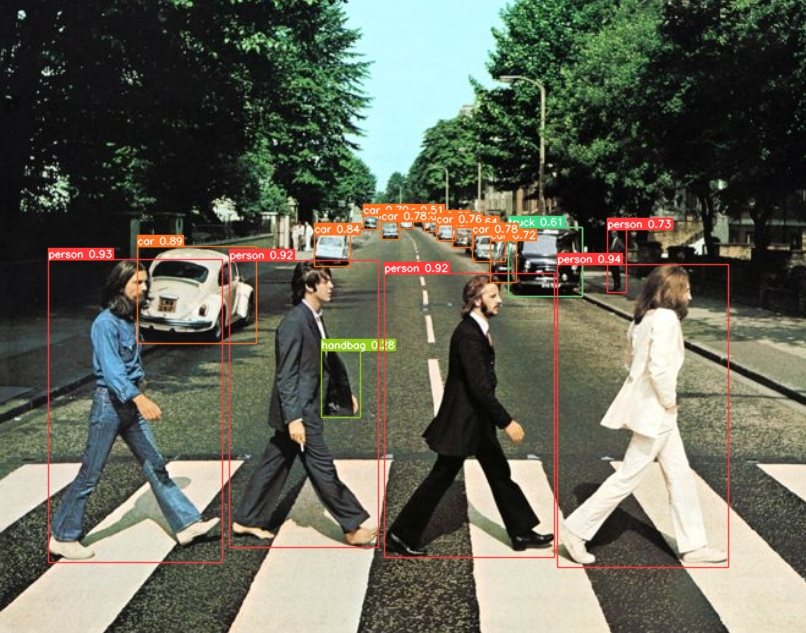

In [ ]:
Image(filename='/content/data/run_image/beatles01.jpg', width=600)

In [ ]:
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/data/beatles01.jpg  \
                            --project /content/data  --name=run_image --exist-ok --line-thickness 1

### Video Detection
* detect.py의 source가 mp4이면 자동으로 Video Detection 수행.

In [ ]:
# 영상 다운로드 하기
!wget -O /content/data/Night_Day_Chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true

--2023-08-14 07:18:33--  https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4 [following]
--2023-08-14 07:18:33--  https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4 [following]
--2023-08-14 07:18:33--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.

In [ ]:
# --project를 /content/data/run_video 로 설정하여 Detect된 영상을 저장.
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/data/Night_Day_Chase.mp4 \
                            --project=/content/data/run_video --exist-ok --line-thickness 1

detect: weights=['yolov3.pt'], source=/content/data/Night_Day_Chase.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/run_video, name=exp, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv3 🚀 v9.6.0-105-g44cb63f Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
yolov3 summary: 261 layers, 61922845 parameters, 0 gradients
video 1/1 (1/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, 42.8ms
video 1/1 (2/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, 9.0ms
video 1/1 (3/1383) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, 9.0ms
video 1/1 (4/1383) /content/data/Night_Day_Chase.mp4: 288x640 

In [ ]:
# Youtube의 경우는 UI 문제로 변환되지 않음. UI가 지원되는 OS에서 적용 필요.
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source https://youtu.be/zbvx7pqw5Gg

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
0: 384x640 (no detections), 9.2ms
0: 384x640 (no detections), 8.5ms
0: 384x640 (no detections), 8.6ms
0: 384x640 (no detections), 8.5ms
0: 384x640 (no detections), 8.5ms
0: 384x640 (no detections), 8.5ms
0: 384x640 (no detections), 10.4ms
0: 384x640 1 person, 8.6ms
0: 384x640 1 person, 8.5ms
0: 384x640 1 person, 8.6ms
0: 384x640 1 person, 8.6ms
0: 384x640 1 person, 8.6ms
0: 384x640 1 person, 8.6ms
0: 384x640 1 person, 8.6ms
0: 384x640 1 person, 8.5ms
0: 384x640 (no detections), 8.5ms
0: 384x640 (no detections), 11.1ms
0: 384x640 (no detections), 8.5ms
0: 384x640 (no detections), 8.7ms
0: 384x640 (no detections), 8.5ms
0: 384x640 (no detections), 8.6ms
0: 384x640 (no detections), 8.5ms
0: 384x640 (no detections), 8.5ms
0: 384x640 (no detections), 8.6ms
0: 384x640 (no detections), 8.5ms
0: 384x640 (no detections), 8.5ms
0: 384x640 (no detections), 8.7ms
0: 384x640 (no detections), 9.0ms
0: 384x640 (no detections), 8.6ms
0: 384x640 (no detections), 8.6m

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/DLCV-master

Mounted at /content/gdrive
/content/gdrive/MyDrive/DLCV-master


In [ ]:
%cd /content/yolov3

/content/yolov3


In [ ]:
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/gdrive/MyDrive/DLCV-master/bryant.mp4 \
                            --project=/content/data/run_video --exist-ok --line-thickness 1

/bin/bash: line 1: cd: yolov3: No such file or directory
detect: weights=['yolov3.pt'], source=/content/gdrive/MyDrive/DLCV-master/bryant.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/run_video, name=exp, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv3 🚀 v9.6.0-105-g44cb63f Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
yolov3 summary: 261 layers, 61922845 parameters, 0 gradients
video 1/1 (1/95) /content/gdrive/MyDrive/DLCV-master/bryant.mp4: 384x640 3 persons, 1 baseball bat, 1 baseball glove, 39.1ms
video 1/1 (2/95) /content/gdrive/MyDrive/DLCV-master/bryant.mp4: 384x640 3 persons, 1 baseball bat, 1 baseball glove, 9.7ms
video 1/1 (3/95) /co